Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitize and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [ ]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline   


In [6]:
#### load the movie and credit and create their dataframes

credits_df = pd.read_table('credit.txt', delim_whitespace=True)
movies_df = pd.read_csv('movies.csv')

movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

In [35]:
movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 
                'original_language', 'homepage', 'overview', 
                'production_companies', 'original_title'
               ],inplace=True, axis=1)

#### Remove any duplicate rows

In [36]:
# Use the function drop_duplicates to remove all instances of duplicated data
# The function takes the parameters subset, keep and inplace
# "subset" takes the title of the column and accepts 'None' as the default value
# "keep" controls what is considered as a duplicate value and "first" considers 
# first value as unique and the rest of the same values as duplicate
# "inplace" removes duplicate values if True

movies_df.drop_duplicates(subset = None, 
                     keep = False, inplace = True)

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [37]:
# Drop entries with O values in budget and revenue columns using dataframe.drop() function
# Use a condition to filter movies with a budget and revenue of 0

movies_df.drop(movies_df[movies_df['budget'] == 0].index, inplace = True) 

movies_df.drop(movies_df[movies_df['revenue'] == 0].index, inplace = True) 

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [8]:
# Change the release_date column to DateTime column
movies_df['date_parsed'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')

# Extract the release year from every release date and create a seperate for it
movies_df['year'] = pd.DatetimeIndex(movies_df['release_date']).year
print(movies_df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'date_parsed', 'year'],
      dtype='object')


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [39]:
# Convert 'budget' and 'revenue' into 'int64' type using astype('int64') method
movies_df.budget = movies_df.budget.astype('int64') 

movies_df.revenue = movies_df.revenue.astype('int64') 

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [ ]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [48]:
# By comparing the movies with the highest budgets and those with the biggest 
# revenue, we can see that those movies with the highest budget (the most expensive 
# movies) recorded a loss as none of those movies are in the top 5 highest grossing films

# The top 5 most expensive movies include: 1) Pirates of the Caribbean: On Stranger Tides
# 2) Pirates of the Caribbean: At World's End 3) Avengers: Age Of Ultron 4) Superman Returns
# 5) John Carter

# The cheapest movies include: 1) Modern Times 2) A Farewell to Arms 3) Split Second 4) Bran 
# Nue Dae 5) The Prophecy

movies_df.sort_values("budget", ascending = False, inplace = True)    # 5 most expensive movies
movies_df.sort_values("budget", ascending = True, inplace = True)     # 5 cheapest movies
 
# displaying top 5 values 
movies_df.head(5) 

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,date_parsed,year,profit
4238,1,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",3082,28.276480,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1936-02-05,8500000,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Modern Times,8.1,856,1936-02-05,1936,8499999
3611,4,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",22649,1.199451,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1932-12-08,25,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",A Farewell to Arms,6.2,28,1932-12-08,1932,21
3372,7,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",13006,4.857028,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",1992-05-01,5,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Split Second,5.7,63,1992-05-01,1992,-2
3419,7,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",38415,0.050456,[],2009-08-09,7,82.0,[],Bran Nue Dae,5.2,6,2009-08-09,2009,0
4608,8,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 27, ""na...",11980,11.818333,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-09-01,16,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Prophecy,6.4,138,1995-09-01,1995,8


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [10]:
# create a column for profit by subtracting revenue from budget
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# show the top 5 most profitable movies
movies_df.nlargest(5, ['profit']) 

# get the bottom 5 least profitable movies
movies_df.nsmallest(5, ['profit']) 

# With the exception of 'Titanic' the most profitable movies 
# tend to be action and sci-fi movies. This should be taking into 
# considering when creating a budget for a movie

# The least profitable movies made a significant loss
# These movies tend be niche genre's such as Westerns
# and Adventure and are generally not as well received
# by large audiences

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,date_parsed,year,profit
13,255000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://disney.go.com/the-lone-ranger/,57201,"[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,149.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never Take Off the Mask,The Lone Ranger,5.9,2311,2013-07-03,2013.0,-165710090
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,2010-02-11,2010.0,-150000000
338,145000000,"[{""id"": 37, ""name"": ""Western""}, {""id"": 36, ""na...",NaN,10733,"[{""id"": 1556, ""name"": ""texas""}, {""id"": 3776, ""...",en,The Alamo,Based on the 1836 standoff between a group of ...,10.660441,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",...,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,You will never forget,The Alamo,5.8,106,2004-04-07,2004.0,-119180039
141,150000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://disney.go.com/disneypictures/marsneedsm...,50321,"[{""id"": 5202, ""name"": ""boy""}, {""id"": 9951, ""na...",en,Mars Needs Moms,"When Martians suddenly abduct his mom, mischie...",12.362599,"[{""name"": ""Walt Disney Animation Studios"", ""id...",...,88.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mom needs a little space.,Mars Needs Moms,5.5,199,2011-03-09,2011.0,-111007242
1652,100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,14164,"[{""id"": 3436, ""name"": ""karate""}, {""id"": 9715, ...",en,Dragonball Evolution,The young warrior Son Goku sets out on a quest...,21.677732,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The legend comes to life.,Dragonball Evolution,2.9,462,2009-04-01,2009.0,-100000000


In [61]:
#Find the most talked about movies. Sort the dataframe based on the popularity column.
#popularity

movies_df.sort_values('popularity', axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 


movies_df.head(5)

# Movies that are popular among viewers are light-hearted movies
# like 'Minions', 'Deadpool' and 'Guardians of the Galaxy'

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,date_parsed,year,profit
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,875.581305,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Minions,6.4,4571,2015-06-17,2015,1082730962
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,724.247784,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Interstellar,8.1,10867,2014-11-05,2014,510120017
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",293660,514.569956,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Deadpool,7.4,10995,2016-02-09,2016,725112979
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",118340,481.098624,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Guardians of the Galaxy,7.9,9742,2014-07-30,2014,603328629
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",76341,434.278564,"[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mad Max: Fury Road,7.2,9427,2015-05-13,2015,228858340


#### Find Movies which are rated above 7



In [23]:
movies_df.sort_values('vote_average', axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 

df_filtered = [movies_df['vote_average'] >= 7] 
movies_df
df_filtered

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
3992,0,[],NaN,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0,0.0,[],Released,NaN,Sardaarji,9.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,130000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/movies/movie/180/ant-man,102899,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Ant-Man,Armed with the astonishing ability to shrink i...,120.093610,"[{""name"": ""Marvel Studios"", ""id"": 420}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-07-14,519311965,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Heroes don't get any bigger.,Ant-Man,7.0,5880
2974,11000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,304410,"[{""id"": 1643, ""name"": ""deafness""}, {""id"": 6027...",fr,La Famille Bélier,"The whole Bélier family is deaf, except for si...",25.302978,"[{""name"": ""France 2 Cin\u00e9ma"", ""id"": 83}, {...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",2014-12-17,0,105.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,The Bélier Family,7.0,766
4073,2000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,11561,"[{""id"": 572, ""name"": ""sex""}, {""id"": 2020, ""nam...",en,Sleeper,"Miles Monroe, a clarinet-playing health food s...",10.664202,"[{""name"": ""Rollins-Joffe Productions"", ""id"": 1...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1973-12-17,18344729,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Woody Allen takes a nostalgic look at the future.,Sleeper,7.0,200
3911,3000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",NaN,29463,[],en,Krush Groove,"Russell Walker is a young, successful manager ...",0.720091,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1985-10-25,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It's chillin'!,Krush Groove,7.0,11


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [79]:
# In order to find the profitable of movies by year we first need to 
# group the movies by 'year'
# this can be achieved by using the groupby() function
group_by_year = movies_df.groupby(by=['year'])

# We can then find the accumulated value of profits of each year by adding
# the profits using the sum() function
profits_year = round(group_by_year.sum(),0)

# find the year with the highest profit
print(profits_year.profit.max())     #17029736072

# use this value to locate the year that made the highest profit
profits_year[profits_year['profit'] == 17029736072]

17029736072


,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit
year,,,,,,,,
2014,7017500000,25558140,8317.0,24047236072,15009.0,856.0,238382,17029736072


#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

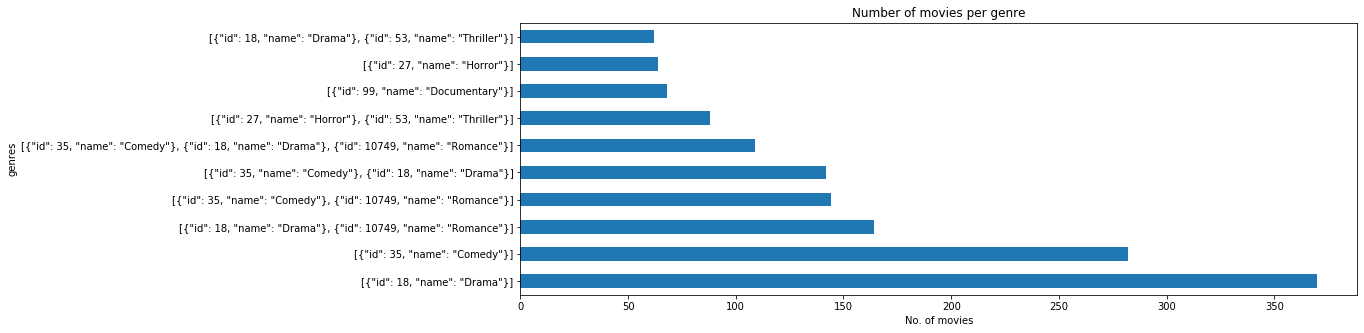

In [9]:
# import the necessary modules for visual analysis

import matplotlib.pyplot as plt
%matplotlib inline

movies_df.genres.value_counts().nlargest(10).plot(kind='barh', figsize=(15,5))
plt.title("Number of movies per genre")
plt.ylabel('genres')
plt.xlabel('No. of movies');

# The bar graph indicates that the 'Drama' genre produces the most movies,
# and 'Comedy' the second most. 

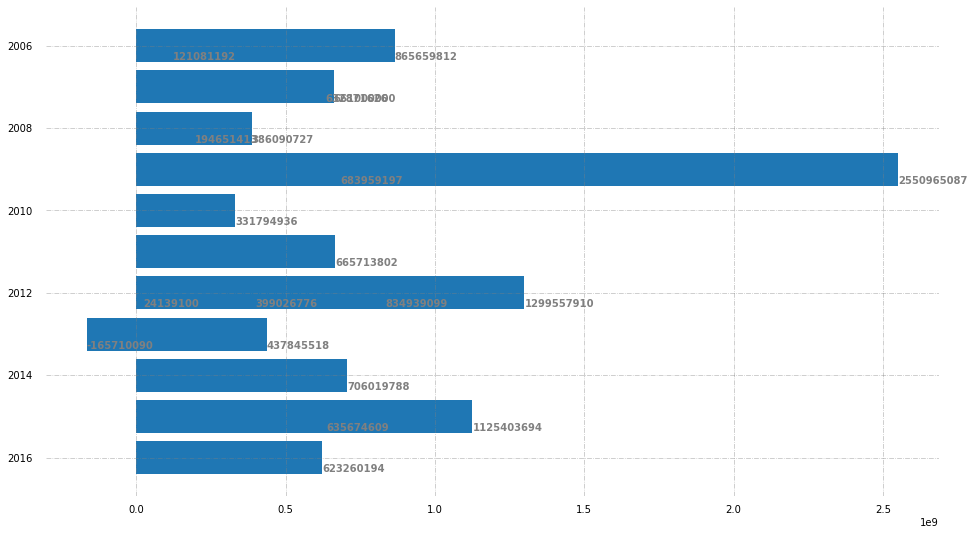

In [11]:
# The following bar graph shows the profits made 
# per year

group_by_year = movies_df.groupby(by=['year'])

year_mean = round(group_by_year.mean(),0)

year = movies_df['year'].head(20) 
profit = movies_df['profit'].head(20) 
  
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(year, profit) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.75, 
        alpha = 0.5) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.5, i.get_y()+0.75,  
             str(round((i.get_width()), 4)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
# Show Plot 
plt.show() 

# We find that the most profitable movies were made in 2009, and the least
# profitable movies were made in 2013 where losses were recorded

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualizations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

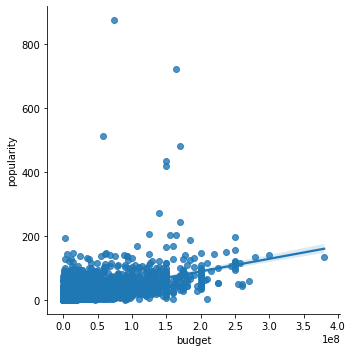

In [28]:
# Scatter plot showing how budget relates to overall popularity

g = sns.lmplot('budget',"popularity", movies_df);

# we find that there is no real correlation between how big (or small)
# and how well the audience receives the movies
# A few outliers occur in the middle range of the budget


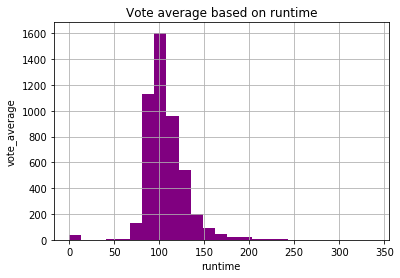

In [20]:
# The following histogram shows the vote average for movies based on runtime

movies_df['runtime'].hist(bins=25,color='purple');
plt.title("Vote average based on runtime")
plt.ylabel('vote_average')
plt.xlabel('runtime');

# We find that audiences tend to prefer movies with a runtime of 100 minutes.
# Movies on either extremes (very short or very long) are far less popular
# with audiences